In [56]:
%run LinearAlgebra.ipynb

## Reduced form

### Example with more columns than rows

In [57]:
C = ComplexBallField(16)

A = random_matrix(RR,3,4)
M = matrix(C,list(A))
print(M)

[[-0.06409 +/- 2.92e-6]  [-0.8060 +/- 7.26e-6]   [0.9473 +/- 3.88e-6]   [0.1582 +/- 4.39e-5]]
[ [-0.6711 +/- 2.77e-6]  [-0.6264 +/- 8.32e-6]  [-0.3009 +/- 5.69e-6]   [0.4235 +/- 2.71e-5]]
[  [0.6134 +/- 3.68e-5]   [0.1188 +/- 4.06e-5]  [-0.5806 +/- 2.20e-5]  [-0.4351 +/- 1.92e-5]]


In [58]:
rank = reduce(M)
print(M)

[               1.000                    0                    0 [-0.622 +/- 6.16e-4]]
[                   0                1.000                    0 [-0.050 +/- 2.57e-4]]
[                   0                    0                1.000 [0.0825 +/- 4.77e-5]]


In [59]:
rank

3

### Example with more rows than columns

In [60]:
A = random_matrix(RR,4,3)
M = matrix(C,list(A))
print(M)

[ [0.1150 +/- 1.71e-5]  [0.3230 +/- 4.46e-5]  [0.5942 +/- 3.53e-6]]
[ [0.4725 +/- 1.19e-5] [-0.4124 +/- 2.42e-5] [-0.7255 +/- 3.59e-5]]
[[-0.2587 +/- 5.21e-6]  [0.1218 +/- 2.58e-5] [-0.7279 +/- 8.00e-7]]
[ [0.2446 +/- 2.98e-5]  [0.7064 +/- 3.47e-5] [-0.6700 +/- 9.38e-6]]


In [61]:
reduce(M)
print(M)

[1.000     0     0]
[    0 1.000     0]
[    0     0 1.000]
[    0     0     0]


### Example with square matrix

In [62]:
C = ComplexBallField(32)

n=3
A = random_matrix(RR,n,n)
M = matrix(C,list(A))
print(M)

[ [-0.103612956 +/- 3.50e-10]  [-0.814521862 +/- 6.07e-11]   [0.557685704 +/- 3.53e-10]]
[ [-0.679796017 +/- 9.82e-11] [-0.0196802615 +/- 1.78e-11]   [0.310908342 +/- 2.47e-11]]
[ [-0.567524707 +/- 2.50e-10]   [0.804432933 +/- 2.41e-10]   [0.327647271 +/- 3.61e-10]]


In [63]:
reduce(M)
print(M)

[1.00000000          0          0]
[         0 1.00000000          0]
[         0          0 1.00000000]


In [64]:
M = matrix(C,list(A))
M.echelon_form()

[[1.0000000 +/- 1.09e-9]           [+/- 4.05e-8]           [+/- 8.19e-8]]
[          [+/- 1.02e-9] [1.0000000 +/- 3.66e-9]           [+/- 4.87e-8]]
[         [+/- 8.56e-10]           [+/- 3.55e-8]  [1.000000 +/- 7.01e-8]]

### Example with singular matrix

In [65]:
M = matrix(C,list(A))
P = M.characteristic_polynomial(); print(P)

x^3 + ([-0.204354054 +/- 2.95e-10])*x^2 + ([-0.52567077 +/- 3.58e-9])*x + [0.322317445 +/- 5.89e-10]


In [66]:
CX.<X> = C[]; pol = CX(list(P))
pol.roots(multiplicities=False)

[[-0.85368451 +/- 6.51e-9] + [+/- 2.05e-9]*I,
 [0.52901928 +/- 8.02e-9] + [-0.31256835 +/- 7.13e-9]*I,
 [0.52901928 +/- 8.02e-9] + [0.31256835 +/- 7.13e-9]*I]

In [67]:
r = pol.roots(multiplicities=False)[0].real(); r

[-0.85368451 +/- 6.51e-9]

In [68]:
M = M-r*identity_matrix(C,3); M

[   [0.75007156 +/- 3.88e-9] [-0.814521862 +/- 2.72e-10]  [0.557685704 +/- 7.29e-10]]
[[-0.679796017 +/- 4.58e-10]    [0.83400425 +/- 5.20e-9]  [0.310908342 +/- 1.30e-10]]
[[-0.567524707 +/- 5.21e-10]  [0.804432933 +/- 4.52e-10]    [1.18133179 +/- 7.35e-9]]

In [69]:
M.determinant()

[+/- 1.06e-8]

In [70]:
M.echelon_form()

[[1.0000000 +/- 7.74e-9]           [+/- 1.53e-7]                     nan]
[          [+/- 6.11e-9]   [1.00000 +/- 1.32e-7]                     nan]
[          [+/- 5.29e-9]           [+/- 3.17e-8]                     nan]

In [71]:
reduce(M)
print(M)

[            1.00000000                      0 [9.997389 +/- 6.69e-7]]
[                     0             1.00000000 [8.521651 +/- 3.21e-7]]
[                     0                      0          [+/- 7.76e-8]]


In [72]:
a = RBF(0.4).add_error(0.5)
b = RBF(1)
print(a,b,b/a)

[+/- 0.901] 1.000000000000000 nan


### Complexity comparison between "echelonize" (Sage function) and "reduce"

In [76]:
accuracy = 53
n = 10
C = ComplexBallField(accuracy)

A = random_matrix(RR,n,n)
M = matrix(C,list(A))

%time reduce(M)

CPU times: user 8.3 ms, sys: 6 µs, total: 8.3 ms
Wall time: 7.78 ms


10

In [77]:
M = matrix(C,list(A))

%time M.echelonize()

CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 1.54 ms


In [79]:
# qlq minutes pour Nmax=200, nb_tests = 10
t1 = cputime()
Nmax = 150
nb_tests = 1
N = [10,20..Nmax]
T = [0.]*len(N)
Tarb = [0.]*len(N)

for ctp in range(nb_tests) :
    for i in range(len(N)) :
        n = N[i]
        mat_alea = random_matrix(RR,n,n)
        M = matrix(C,list(mat_alea))
        t0 = RR(cputime(subprocesses=True))
        M.echelonize()
        t = RR(cputime(subprocesses=True))-t0
        T[i] = T[i] + t
        M = matrix(C,list(mat_alea))
        t0 = RR(cputime(subprocesses=True))
        reduce(M)
        t = RR(cputime(subprocesses=True))-t0
        Tarb[i] = Tarb[i] + t
print(cputime()-t1)

9.443888000000243


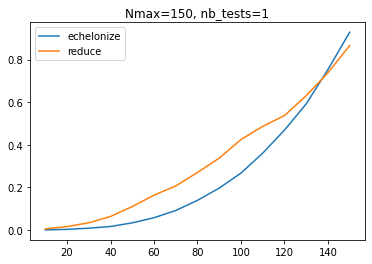

In [80]:
import matplotlib.pyplot as plt
plt.plot(N,T,label='echelonize')
plt.plot(N,Tarb,label='reduce')
plt.legend()
plt.title('Nmax='+str(Nmax)+', nb_tests='+str(nb_tests))
plt.show()

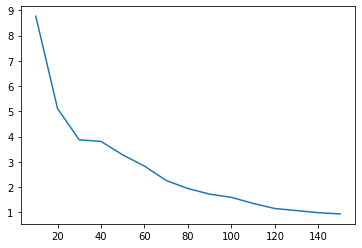

In [81]:
Ratio = [Tarb[i]/T[i] for i in range(len(T))]
plt.plot(N,Ratio)
plt.show()

## $\text{Inv}_{\mathcal{M}}(v)$
### Example with one matrix

In [82]:
R = RealBallField(53)
eps = 1e-10
M = matrix(R,[[1,1,1],[0,1,2],[0,0,3]])
mat_alea = random_matrix(RR,3,3)
P = matrix([[R(mat_alea[i,j]).add_error(eps) for j in range(3)] for i in range(3)])
M = P*M*P^(-1)
print(M)

u = P*vector(R,[1,0,0]) # vecteur propre
v = P*vector(R,[0,1,0]) # vecteur non propre mais qui n'engendre pas tout K^3
print(u)
print(v)

[ [0.24968183 +/- 6.67e-9] [-0.18709749 +/- 3.85e-9]  [1.10587279 +/- 6.55e-9]]
[ [0.85656110 +/- 9.94e-9]   [1.4241198 +/- 2.97e-8]  [-0.7965807 +/- 5.68e-8]]
[[-0.21078458 +/- 6.83e-9]  [0.85825008 +/- 9.54e-9]   [3.3261983 +/- 5.07e-8]]
([0.860863409 +/- 5.42e-10], [-0.940428037 +/- 1.03e-10], [0.424976301 +/- 4.62e-10])
([-0.925909326 +/- 2.98e-10], [-0.095589001 +/- 5.08e-10], [0.134059144 +/- 5.44e-10])


In [83]:
print(Inv([M],u))
print(u)

[(1.000000000000000, [-1.092424219 +/- 5.19e-10], [0.493662870 +/- 6.55e-10])]
([0.860863409 +/- 5.42e-10], [-0.940428037 +/- 1.03e-10], [0.424976301 +/- 4.62e-10])


In [84]:
Inv([M],vector([3,5,-6]))

[(1.000000000000000, 0, 0),
 (0, 1.000000000000000, 0),
 (0, 0, 1.000000000000000)]

### Example with two matrices

In [85]:
R = RealBallField(32)
M1 = matrix(R,[[0,0,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])
print(M1,'\n')
M2 = matrix(R,[[0,0,0,0],[0,0,1,0],[0,0,0,0],[0,0,0,1]])
print(M2,'\n')
v = vector(R,[0,0,1,0])
print(v)

[         0          0 1.00000000          0]
[         0          0          0          0]
[         0          0          0          0]
[         0          0          0 1.00000000] 

[         0          0          0          0]
[         0          0 1.00000000          0]
[         0          0          0          0]
[         0          0          0 1.00000000] 

(0, 0, 1.00000000, 0)


In [86]:
mat_alea = random_matrix(RR,4,4)
P = matrix([[R(mat_alea[i,j]) for j in range(4)] for i in range(4)])
M1 = P*M1*P^(-1)
M2 = P*M2*P^(-1)
v = P*v

print(M1,'\n')
print(M2,'\n')
print(v)

[ [-0.180989 +/- 2.77e-7]  [0.1068546 +/- 7.52e-8]   [0.069104 +/- 1.57e-7]   [0.062039 +/- 1.12e-7]]
[  [-2.98402 +/- 1.93e-6]   [0.086696 +/- 6.70e-7]   [1.183313 +/- 4.13e-7]   [1.250641 +/- 5.96e-7]]
[ [-0.672716 +/- 5.92e-7] [-0.1474779 +/- 8.35e-8]   [0.271150 +/- 2.58e-7]  [0.3046568 +/- 9.46e-8]]
[  [-2.08054 +/- 5.69e-6]   [0.419601 +/- 6.62e-7]   [0.815611 +/- 9.20e-7]    [0.82314 +/- 2.97e-6]] 

[ [-2.59251 +/- 3.32e-6] [-0.761705 +/- 3.37e-7]  [1.050035 +/- 5.21e-7]  [1.200381 +/- 8.47e-7]]
[ [-3.58545 +/- 1.60e-6] [-0.129921 +/- 4.58e-7]  [1.427956 +/- 6.97e-7]  [1.534542 +/- 9.08e-7]]
[[-2.384931 +/- 9.32e-7] [-0.764167 +/- 6.03e-7]  [0.967625 +/- 5.69e-7]  [1.112895 +/- 5.60e-7]]
[ [-6.17269 +/- 3.04e-6] [-1.054269 +/- 6.44e-7]   [2.48017 +/- 5.44e-6]   [2.75481 +/- 2.08e-6]] 

([0.511054801 +/- 5.22e-10], [-0.724045693 +/- 4.09e-10], [0.994771750 +/- 5.21e-10], [0.297096713 +/- 3.69e-10])


In [87]:
Inv([M1],v)

[(1.00000000, 0, [-0.6306 +/- 5.57e-5], [2.9673 +/- 7.24e-5]),
 (0, 1.00000000, [-1.8190 +/- 3.41e-5], [1.6841 +/- 3.85e-5])]

In [88]:
Inv([M2],v)

[(1.00000000, 0, [1.12708 +/- 8.93e-6], [1.3114 +/- 3.67e-5]),
 (0, 1.00000000, [-0.57838 +/- 3.36e-6], [0.51528 +/- 5.26e-6])]

In [90]:
Inv([M1,M2],v)

[(1.00000000, 0, 0, [2.3732 +/- 8.08e-5]),
 (0, 1.00000000, 0, [-0.0296 +/- 5.79e-5]),
 (0, 0, 1.00000000, [-0.9421 +/- 6.63e-5])]